## Sarcasm Detecting using a Dense network

kaggle link for downloading the sarcasm data set:

https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

or use the wget command to copy the file from:

https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json




In [ ]:
# Get the sarcasm data set using wget

!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
      -O /tmp/sarcasm.json


--2020-08-08 09:21:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2020-08-08 09:21:49 (83.3 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json

In [ ]:
# Load the data from json file into python data structures

with open('/tmp/sarcasm.json') as json_file:
  sarcasm_data = json.load(json_file)

In [ ]:
print (sarcasm_data[0])


{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}


Sarcasm is a list of dictionaries. It is an ideal candate to turn into a pandas dataframe


In [ ]:
import pandas as pd

sarcasm_data_df = pd.DataFrame(data=sarcasm_data)

In [ ]:
sarcasm_data_df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
sarcasm_data_df.shape

(26709, 3)

Lets tokenize headlines, we wont be using article_link

In [ ]:
# Import tensorflow 

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
vocab_size = 10000
embedding_dim = 32
max_length = 100
trunc_type='post'
padding_type='post'
oov_token = "<NIC>"
training_size = 20000

In [ ]:
# Define the tokenizer object

tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_token)



In [ ]:
# Build the dictionary

tokenizer.fit_on_texts(sarcasm_data_df['headline'])

In [ ]:
# Print the number of words in the  corpus

print (len(tokenizer.word_index))

29657


In [ ]:
# Turn text into sequences

sequences = tokenizer.texts_to_sequences(sarcasm_data_df['headline'])

In [ ]:
print (sequences[0])

[308, 1, 679, 3337, 2298, 48, 382, 2576, 1, 6, 2577, 8434]


In [ ]:
# Pad the sequences. Padding should happen after the sentence ends

padded_sequences = pad_sequences(sequences,padding=padding_type,truncating=trunc_type,maxlen=max_length)

In [ ]:
print (sequences[0])
print (padded_sequences[0])

[308, 1, 679, 3337, 2298, 48, 382, 2576, 1, 6, 2577, 8434]
[ 308    1  679 3337 2298   48  382 2576    1    6 2577 8434    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
# What is the length of the longest headline?

print (len(padded_sequences[0]))

print (padded_sequences.shape)


100
(26709, 100)


In [ ]:
# Lets split the data set into training and testing sets


training_padded = padded_sequences[:training_size]
training_labels = sarcasm_data_df['is_sarcastic'][:training_size]

In [ ]:
print(len(training_padded))
print(len(training_labels))

20000
20000


In [ ]:
# Testing data and lables

testing_padded = padded_sequences[training_size:]
testing_labels = sarcasm_data_df['is_sarcastic'][training_size:]

In [ ]:
print(len(testing_padded))
print(len(testing_labels))

6709
6709


In [ ]:
# Define the architecture of Neural Network

model = tf.keras.Sequential([
                     tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                     tf.keras.layers.Flatten(),
                     tf.keras.layers.Dense(64, activation='relu'),
                     tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                204864    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 524,929
Trainable params: 524,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the data into the model

history = model.fit(training_padded,
          training_labels,
          epochs=30,
          validation_data=(testing_padded,testing_labels))

Epoch 1/30
625/625 [==============================] - 3s 5ms/step - loss: 0.4596 - accuracy: 0.7631 - val_loss: 0.3092 - val_accuracy: 0.8638
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1809 - accuracy: 0.9302 - val_loss: 0.3277 - val_accuracy: 0.8659
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 0.0632 - accuracy: 0.9803 - val_loss: 0.4302 - val_accuracy: 0.8559
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.0150 - accuracy: 0.9965 - val_loss: 0.5354 - val_accuracy: 0.8611
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.6061 - val_accuracy: 0.8605
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.6555 - val_accuracy: 0.8572
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.7017 - val_accuracy: 0.8583
Epoch 

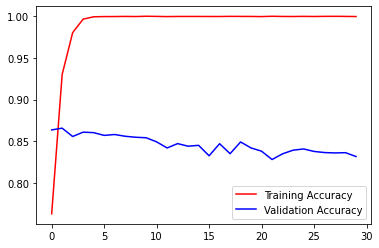

In [ ]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs, val_acc, 'b',label='Validation Accuracy')
plt.legend()
plt.show()

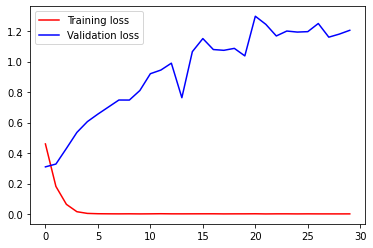

In [ ]:
plt.plot(epochs,loss,'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.legend()
plt.show()

As seen above the loss validation accuracy and validation loss actually deterioate after the first few epochs.

Loss is the amount of confidence you have in your predicition. An increasing loss represents the  decreasing confidence in the acuuracy of your predictions and also indicates overfitting. This is a common problem with NLP applications.

Try to find a set of hyper parameters which gives a training accuracy of 90% or more with a stable loss.



# Sarcasm Detection using LTSM

In [ ]:
# Define a layer with LSTM layer


model_lstm = tf.keras.Sequential([
                                  tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                                  tf.keras.layers.Dense(16, activation='relu' ),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
# Compile the model

model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Fit data into the model

history_lstm = model_lstm.fit(training_padded, training_labels, validation_data=(testing_padded, testing_labels), epochs=30)

Epoch 1/30
625/625 [==============================] - 9s 14ms/step - loss: 0.4028 - accuracy: 0.8053 - val_loss: 0.3274 - val_accuracy: 0.8557
Epoch 2/30
625/625 [==============================] - 8s 13ms/step - loss: 0.2026 - accuracy: 0.9184 - val_loss: 0.3461 - val_accuracy: 0.8559
Epoch 3/30
625/625 [==============================] - 8s 13ms/step - loss: 0.1181 - accuracy: 0.9564 - val_loss: 0.4446 - val_accuracy: 0.8471
Epoch 4/30
625/625 [==============================] - 9s 14ms/step - loss: 0.0723 - accuracy: 0.9755 - val_loss: 0.5125 - val_accuracy: 0.8427
Epoch 5/30
625/625 [==============================] - 9s 14ms/step - loss: 0.0439 - accuracy: 0.9855 - val_loss: 0.6306 - val_accuracy: 0.8436
Epoch 6/30
625/625 [==============================] - 8s 13ms/step - loss: 0.0276 - accuracy: 0.9901 - val_loss: 0.7779 - val_accuracy: 0.8371
Epoch 7/30
625/625 [==============================] - 8s 13ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.8794 - val_accuracy: 0.8399

In [ ]:
def plot_accuracy_loss (history):
  acc = history.history['accuracy']
  loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs,acc,'r',label='Training Accuracy')
  plt.plot(epochs, val_acc, 'b',label='Validation Accuracy')
  plt.legend()
  plt.show()

  plt.figure()
  plt.plot(epochs,loss,'r', label = 'Training loss')
  plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
  plt.legend()
  plt.show()


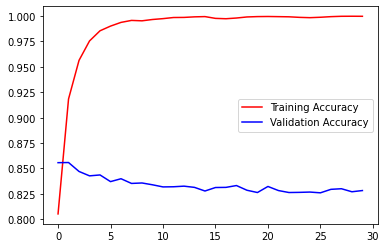

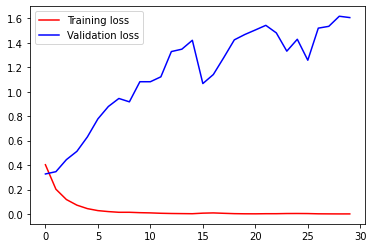

In [ ]:
plot_accuracy_loss(history_lstm)

As seen above the training accuracy peaks after 5 epochs and stays there. Validation accuracy stays stabilises around 0.83.

The validation loss though increases and bounces around. Once again this indicates overfitting and loss of confidence in the predictions of the validation set.

# Multi Layered LSTM

Previous model has just 1 LSTM layer. Lets try 2 LSTM layers and see if that helps.


In [ ]:
# Define a layer with 3 LSTM layer


model_lstm_3 = tf.keras.Sequential([
                                  tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
                                  tf.keras.layers.Dense(8, activation='relu' ),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
# Compile the model

model_lstm_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
# Fit data 

history_lstm_3 = model_lstm_3.fit(training_padded,training_labels,epochs=30,validation_data=(training_padded,training_labels))

Epoch 1/30
625/625 [==============================] - 24s 38ms/step - loss: 0.4278 - accuracy: 0.7907 - val_loss: 0.2173 - val_accuracy: 0.9204
Epoch 2/30
625/625 [==============================] - 22s 36ms/step - loss: 0.2218 - accuracy: 0.9123 - val_loss: 0.1241 - val_accuracy: 0.9601
Epoch 3/30
625/625 [==============================] - 22s 36ms/step - loss: 0.1263 - accuracy: 0.9555 - val_loss: 0.0739 - val_accuracy: 0.9822
Epoch 4/30
625/625 [==============================] - 22s 35ms/step - loss: 0.0785 - accuracy: 0.9743 - val_loss: 0.0365 - val_accuracy: 0.9912
Epoch 5/30
625/625 [==============================] - 22s 35ms/step - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.0300 - val_accuracy: 0.9926
Epoch 6/30
625/625 [==============================] - 22s 35ms/step - loss: 0.0351 - accuracy: 0.9898 - val_loss: 0.0199 - val_accuracy: 0.9951
Epoch 7/30
625/625 [==============================] - 23s 36ms/step - loss: 0.0263 - accuracy: 0.9922 - val_loss: 0.0144 - val_accuracy:

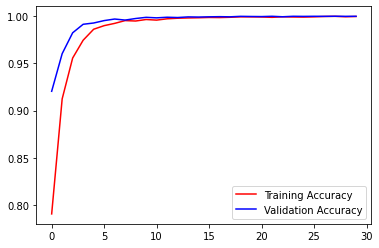

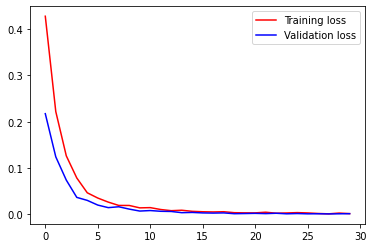

In [ ]:
plot_accuracy_loss(history_lstm_3)

It seems we have found the architecture which is suitable for this problem!
Loss and accuracy curves for training and validation are smooth and behaving as we would like them to.